In [87]:
import numpy as np
import pandas as pd 
import os.path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.linear_model import LogisticRegression
import shap
shap.initjs() # initializing JavaScript for visuals

In [88]:
# actionable_recourse dataset
url = 'https://raw.githubusercontent.com/ustunb/actionable-recourse/master/examples/paper/data/credit_processed.csv'
df = pd.read_csv(url)
df["loanID"] = df.index

In [91]:
# train test split
X = df.drop(columns="NoDefaultNextMonth")
y = df["NoDefaultNextMonth"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [96]:
# train the SHAP explainer
explainer = shap.Explainer(model.predict_proba, X_train)

In [97]:
# this is the test data
test_entry = pd.DataFrame(X_test.iloc[0,:]).transpose()

In [98]:
shap_values = explainer(test_entry)

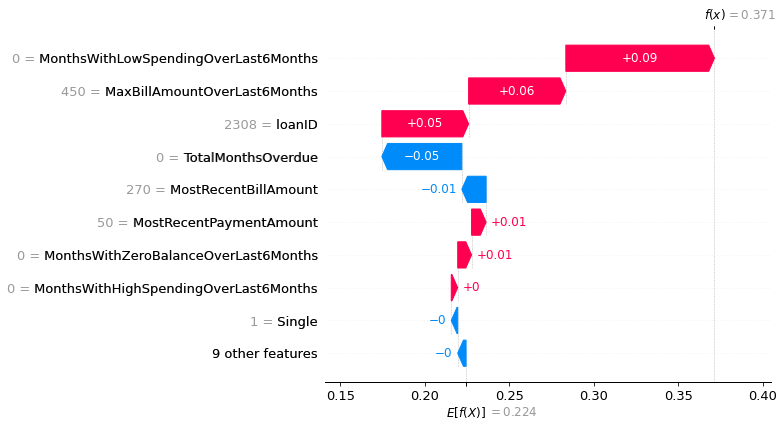

In [99]:
shap.plots.waterfall(shap_values[0,:,0])